In [75]:
import pandas # make sure pandas is imported in this cell

df = pandas.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [77]:
x, y = make_classification(n_samples=100, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1)

In [78]:
# 4. Escalar las características
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing

scaler = StandardScaler()
# Use x_train instead of X_train
X_train = scaler.fit_transform(x_train)
# Use x_test instead of X_test
X_test = scaler.transform(x_test)

In [79]:
# 5. Crear y entrenar el modelo MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), # Define la arquitectura de la red (capas ocultas y neuronas)
                    activation='relu', # Función de activación
                    solver='adam', # Optimizador
                    max_iter=200, # Número máximo de iteraciones
                    random_state=42) # Semilla aleatoria para reproducibilidad

mlp.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), random_state=42)

In [80]:
# 6. Realizar predicciones en el conjunto de prueba
y_pred = mlp.predict(X_test)

In [81]:
# 7. Evaluar el modelo
# make sure you import accuracy_score
from sklearn.metrics import accuracy_score # Import accuracy_score from sklearn.metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.92


# Modelo Keras

In [82]:
import tensorflow as tf
from tensorflow import keras

# Define el modelo Sequential de Keras
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Capa de entrada con 10 neuronas y activación ReLU
    keras.layers.Dense(5, activation='relu'), # Capa oculta con 5 neuronas y activación ReLU
    keras.layers.Dense(1, activation='sigmoid') # Capa de salida con 1 neurona y activación sigmoide para clasificación binaria
])

# Compila el modelo
model.compile(optimizer='adam', # Optimizador
              loss='binary_crossentropy', # Función de pérdida para clasificación binaria
              metrics=['accuracy']) # Métrica para evaluar el rendimiento

# Entrena el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1) # Ajusta epochs y batch_size según sea necesario

# Realiza predicciones
y_pred_keras = model.predict(X_test)
y_pred_keras_classes = (y_pred_keras > 0.5).astype(int) # Convierte las probabilidades a clases (0 o 1)

# Evalúa el modelo
_, accuracy_keras = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión del modelo Keras: {accuracy_keras}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6833 - loss: 0.6845
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6916 - loss: 0.7152 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7205 - loss: 0.6943 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6943 - loss: 0.6768 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7049 - loss: 0.6770 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7038 - loss: 0.6722 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7378 - loss: 0.6445 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7260 - loss: 0.6381 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7640 - loss: 0.6119 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7522 - loss: 0.6145 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7054 - loss: 0.6365 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7495 - loss: 0.5914 
Ep

In [87]:
# Compila el modelo
model.compile(optimizer='adam', # Optimizador
              loss='binary_crossentropy', # Función de pérdida para clasificación binaria
              metrics=['accuracy']) # Métrica para evaluar el rendimiento
accuracy_keras = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión del modelo Keras: {accuracy_keras}")

Precisión del modelo Keras: [0.2012229710817337, 0.9200000166893005]


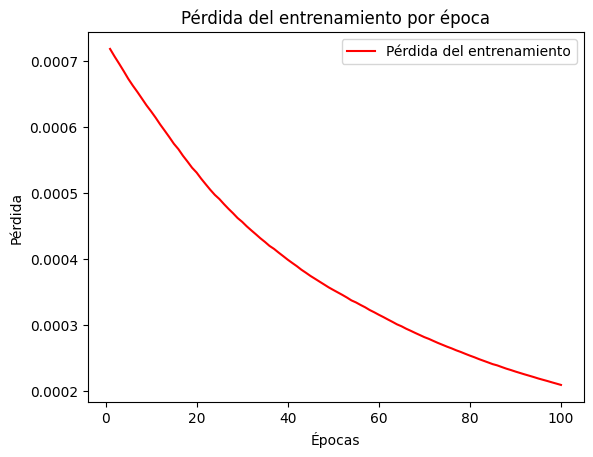

In [89]:
import matplotlib.pyplot as plt

# Obtén la historia del entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Extrae la pérdida del historial
loss = history.history['loss']

# Crea el gráfico
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Pérdida del entrenamiento')
plt.title('Pérdida del entrenamiento por época')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [84]:
# Entrena el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1) # Ajusta epochs y batch_size según sea necesario


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9632 - loss: 0.1516
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9710 - loss: 0.1521 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9789 - loss: 0.1216 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9632 - loss: 0.1502 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9828 - loss: 0.1184 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9828 - loss: 0.1172 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9710 - loss: 0.1217 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9828 - loss: 0.1083 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9828 - loss: 0.1076 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9789 - loss: 0.1094 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9632 - loss: 0.1251 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9749 - loss

In [85]:

# Realiza predicciones
y_pred_keras = model.predict(X_test)
y_pred_keras_classes = (y_pred_keras > 0.5).astype(int) # Convierte las probabilidades a clases (0 o 1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [86]:

# Evalúa el modelo
_, accuracy_keras = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión del modelo Keras: {accuracy_keras}")

Precisión del modelo Keras: 0.9200000166893005
